# Predicting Customer Churn - Market Analysis for a TeleCom Company

In this notebook I present work done on the custmer churn dataset form a telecom company. This dataset was taken from the DataCamp project on the same topic. 

I perform Data Pre-processing, Data Visualization, Model Building, Model Evaluation and lastly Model Tuning in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## 1. Basic Data Exploration 

In [2]:
telco = pd.read_csv('Churn.csv')

In [3]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [5]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [6]:
telco.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [7]:
telco.duplicated().sum()

0

In [8]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [9]:
telco.groupby(['Churn']).mean()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
yes,102.664596,5.115942,206.914079,212.410145,205.231677,10.700000,2.229814,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805


Two things catch the eye here - Vmail_Message for churners and non-churners has a huge gap, similarly the CustServ_Calls also has a great difference between the two

In [10]:
#churners make more cust serv calls than non churners
#churners have less voice mail messages than non chruners
telco.groupby(['Churn']).mean()[['Vmail_Message','CustServ_Calls']]

,Vmail_Message,CustServ_Calls
Churn,,
no,8.604561,1.449825
yes,5.115942,2.229814


In [11]:
telco.groupby(['Churn']).std()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


In [12]:
telco.groupby(['Churn']).std()[['Vmail_Message','CustServ_Calls']]

,Vmail_Message,CustServ_Calls
Churn,,
no,13.913125,1.163883
yes,11.860138,1.853275


State wise count of churners

In [13]:
#when dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not. 
telco.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64

## 2. Data Visualization

### Visualize the data distribution

/Users/vraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


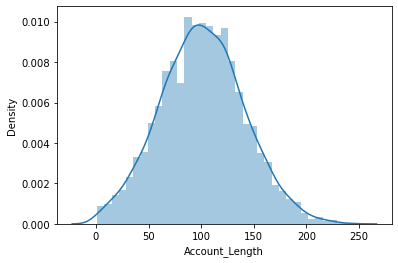

In [14]:
#visualize the distribution of Account_Length
sns.distplot(telco['Account_Length'])
plt.show()

This resembles a bell curve (normal distribution). ML models actually assume the data comes in the form of a mornal distribution. Hence, our data seems fine. Lets have a look at a few other columns' distribution to see if its the same

/Users/vraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


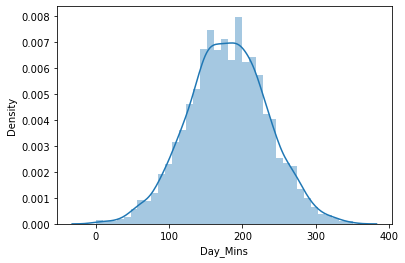

In [15]:
#visualize the distribution of Day_Mins
sns.distplot(telco['Day_Mins'])
plt.show()

/Users/vraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


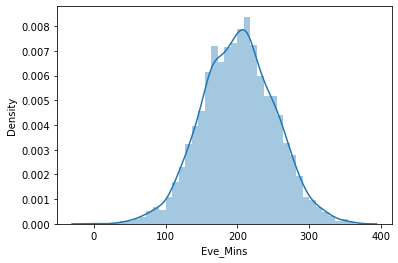

In [16]:
#visualize the distribution of Eve_Mins
sns.distplot(telco['Eve_Mins'])
plt.show()

/Users/vraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


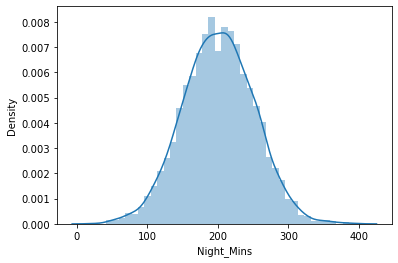

In [17]:
#visualize the distribution of Night_Mins
sns.distplot(telco['Night_Mins'])
plt.show()

/Users/vraj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


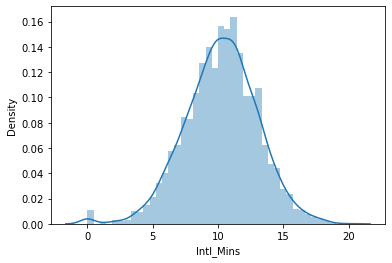

In [18]:
#visualize the distribution of Intl_Mins
sns.distplot(telco['Intl_Mins'])
plt.show()

### Box plots would be a helpful visualization for this data since I wish to measure the differences of churners and non-churners

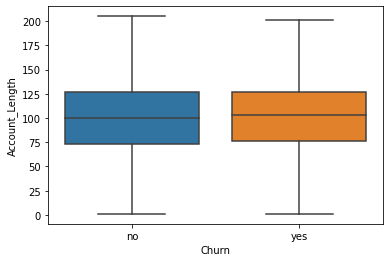

In [19]:
#difference in account length for churners and non churners
sns.boxplot(x = 'Churn', y = 'Account_Length', data = telco, sym = "")
plt.show()

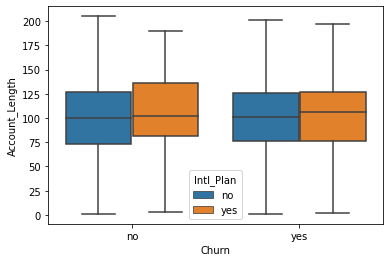

In [20]:
#further compare using a 3rd parameter
sns.boxplot(x = 'Churn', y = 'Account_Length', data = telco, sym = "", hue = 'Intl_Plan')
plt.show()

Looking at this plot I can conclude that having an intl plan or not is not of much significance 

Somewhere above we noticed the difference in number of custsercv_calls and vmail_message for churners and non chruners. Lets have a look at plots of these.

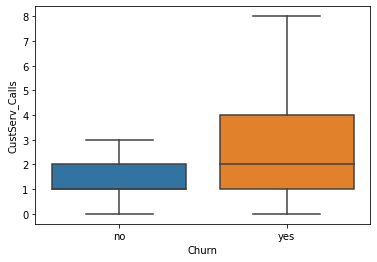

In [21]:
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "")
plt.show()

### There is a very noticeable difference in number of customer service calls here between churners and non-churners!

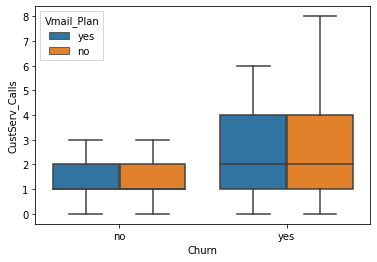

In [22]:
#further compare using a 3rd parameter - vmail_plan
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = "Vmail_Plan")
plt.show()

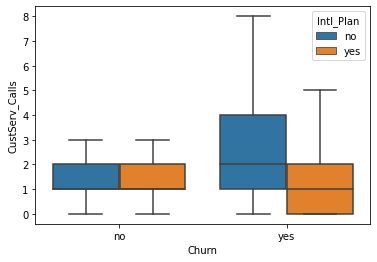

In [23]:
#further compare using a 3rd parameter - intl_plan
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = "Intl_Plan")
plt.show()

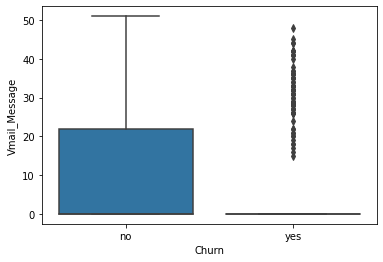

In [24]:
sns.boxplot(x = 'Churn', y = 'Vmail_Message', data = telco)
plt.show()

### Again, a huge difference in Voice mail messages

## 3. Data Preprocessing

### Label Encoding - making all non integer type columns to integer columns. Use LabelEncoder to transform values into numeric

In [25]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [26]:
#extract columns having data type as object (i.e non numeric)
for col in telco:
    if telco[col].dtypes =='object':
        telco[col] = preprocessing.LabelEncoder().fit_transform(telco[col])

In [27]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan           int64
Vmail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State               int64
Area_Code           int64
Phone               int64
dtype: object

In [28]:
telco.nunique()

Account_Length     212
Vmail_Message       46
Day_Mins          1667
Eve_Mins          1611
Night_Mins        1591
Intl_Mins          162
CustServ_Calls      10
Churn                2
Intl_Plan            2
Vmail_Plan           2
Day_Calls          119
Day_Charge        1667
Eve_Calls          123
Eve_Charge        1440
Night_Calls        120
Night_Charge       933
Intl_Calls          21
Intl_Charge        162
State               51
Area_Code            3
Phone             3333
dtype: int64

### Drop unnecessary features - Phone, Area Code and State are unimportant columns in the context of our problem, I drop these

In [29]:
telco = telco.drop(['State', 'Area_Code', 'Phone'], axis = 1)

In [30]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In order to prepare a model, I will first take a look at the features and finalize the important features using which I will perform the churn prediction

### Drop highly correlated features as they do not provide additional information to the model

In [31]:
corr_matrix = telco.corr()
corr_matrix.style.background_gradient()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259
Intl_Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780
Vmail_Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276


In [32]:
telco.drop(['Vmail_Plan', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge'], axis = 1, inplace = True)

In [33]:
corr_matrix = telco.corr()
corr_matrix.style.background_gradient()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Day_Calls,Eve_Calls,Night_Calls,Intl_Calls
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.038470,0.019260,-0.013176,0.020661
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,-0.009548,-0.005864,0.007123,0.013957
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,0.006750,0.015769,0.022972,0.008033
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,-0.021451,-0.011430,0.007586,0.002541
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.022938,-0.002093,0.011204,-0.012353
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,0.021565,0.008703,-0.013605,0.032304
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.018942,0.002423,-0.012802,-0.017561
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,0.018459,0.009233,0.006141,-0.052844
Intl_Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.003755,0.006114,0.012451,0.017366
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.018459,0.003755,1.000000,0.006462,-0.019557,0.004574


### Split the data into train and test data

In [34]:
X = telco.drop('Churn', axis = 1)
y = telco['Churn']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### Feature scaling

In [36]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Day_Calls,Eve_Calls,Night_Calls,Intl_Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,100.435644,100.114311,100.107711,4.479448
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,20.069084,19.922625,19.568609,2.461214
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,87.000000,87.000000,87.000000,3.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,101.000000,100.000000,100.000000,4.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,114.000000,114.000000,113.000000,6.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,165.000000,170.000000,175.000000,20.000000


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(X_train)
X_test = scaler.fit_transform(X_test)
print(X_test)

[[-0.03706973 -0.57650767 -2.31685332 ...  0.15892115  1.27707137
  -0.60951022]
 [ 0.58637088 -0.57650767  0.24807892 ...  0.8152283   2.68737026
   0.21794823]
 [-0.26150835 -0.57650767  0.76401356 ...  0.15892115  1.22670356
   0.63167746]
 ...
 [-0.18669548 -0.57650767 -1.51346938 ...  1.47153545  0.72302538
  -0.195781  ]
 [ 0.96043524 -0.57650767 -0.85012483 ... -0.09350467  1.27707137
  -1.02323945]
 [ 0.78587187  1.69506761 -0.11123271 ...  0.25989148 -1.19095169
   1.87286514]]
[[-0.87987189 -0.62771317  0.80395182 ...  0.06317911  0.30867855
  -0.58357754]
 [-0.01058485 -0.62771317 -1.37447804 ... -1.17659933  2.06102535
  -0.19296339]
 [-0.77760283 -0.62771317  1.7208976  ...  1.20377527 -1.07195833
  -0.9741917 ]
 ...
 [-0.39409384  1.98806114 -0.12393169 ...  0.06317911 -0.22233564
  -0.58357754]
 [-0.54749743 -0.62771317 -0.59060788 ...  1.5013221   1.0520984
  -0.19296339]
 [-0.75203556 -0.62771317 -1.51484548 ... -0.8790525  -0.80645124
  -0.9741917 ]]


## 4. Model Building

### Supervised Machine Learning for the Classification problem
I will explore Logistic Regression Classifier, Decision Tree Classifier and Random Forest Classifier

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
print(lr.score(X_test, y_test))

0.846


In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
print(dt.score(X_test, y_test))

0.907


In [42]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
print(rf.score(X_test, y_test))

0.946


## 5. Model Evaluation
Now, I evaluate these models using different metrics and determine the best suited model for our problem.

An important to notice here is the imbalance of the prediction classes: more data belong to one class than the other. Non churners rows are almost 6 times more than churners, this can impact perofrmance as our model could always predict the majority class.

In [44]:
#imbalanced classes
telco['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

### Therefore accuracy is not much of a helpful metric in this case.

### In this case we look at the confusion matrix, specifically the Precision and Recall

A model with high precision means there are few false positives, meaning not many non churners were classified as churners.

A model with high recall means is correctly classified most churners

Which metric - precision or recall - you optimise depends on your business case
 - If the offers you make to keep potential churners is high in relation to the value of losing customers you want your model to have high precision (or minimize false positvies)

 - Conversely, if losing customers you didnt think would churn is more expensive than an offer to keep a customer that would not have churned then you want a high recall (or minimize false negatives)

In [45]:
lr_pred = lr.predict(X_test)
confusion_matrix(y_test, lr_pred)

array([[826,  29],
       [125,  20]])

In [46]:
dt_pred = dt.predict(X_test)
confusion_matrix(y_test, dt_pred)

array([[798,  57],
       [ 36, 109]])

In [47]:
rf_pred = rf.predict(X_test)
confusion_matrix(y_test, rf_pred)

array([[849,   6],
       [ 48,  97]])

In [48]:
print('For Linear Regressor Classifier Tree Classifier')
print('Recall score: ', recall_score(y_test, lr_pred))
print('Precision score: ', precision_score(y_test, lr_pred))

For Linear Regressor Classifier Tree Classifier
Recall score:  0.13793103448275862
Precision score:  0.40816326530612246


In [49]:
print('For Decision Tree Classifier')
print('Recall score: ', recall_score(y_test, dt_pred))
print('Precision score: ', precision_score(y_test, dt_pred))

For Decision Tree Classifier
Recall score:  0.7517241379310344
Precision score:  0.6566265060240963


In [50]:
print('For Random Forest Classifier')
print('Recall score: ', recall_score(y_test, rf_pred))
print('Precision score: ', precision_score(y_test, rf_pred))

For Random Forest Classifier
Recall score:  0.6689655172413793
Precision score:  0.941747572815534


### Next, I look at the ROC Curve and AUC for each of these to determine the best model

In [51]:
#generate the probabilities
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]

In [52]:
#generate the probabilities
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]

In [53]:
#generate the probabilities
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

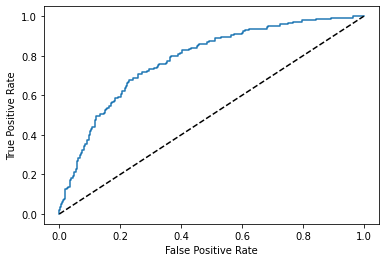

In [54]:
#calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

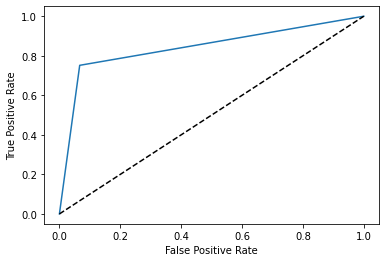

In [55]:
#calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dt)

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

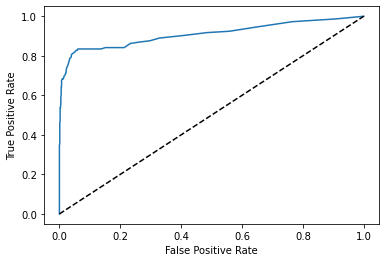

In [56]:
#calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

### It looks like Random Forest Classifier has the best ROC, lets look at the AUC for each to find out

In [57]:
print(roc_auc_score(y_test,y_pred_prob_lr))

0.7812704174228675


In [58]:
print(roc_auc_score(y_test,y_pred_prob_dt))

0.8425287356321839


In [59]:
print(roc_auc_score(y_test,y_pred_prob_rf))

0.9091954022988504


### It turns out the Random Forest has the best AUC

#### There is a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. 

#### The AUC is one metric you can use in these cases. Another one is the F1 score. The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes. It is calculated as below:

In [60]:
print(f1_score(y_test, lr_pred))

0.20618556701030924


In [61]:
print(f1_score(y_test, dt_pred))

0.7009646302250803


In [62]:
print(f1_score(y_test, rf_pred))

0.782258064516129


### Looking at various metrics like- precision, recall, AUC and F1 score I conclude that the Random Forest Classifier is the best model. I now shift focus onto hypertuning the model for the best parameters.

## 6. Model Tuning (Hyperparameter tuning)

### Using GridSearchCV

In [63]:
param_grid = {"max_depth": [3, None],
              "n_estimators": [20, 50, 60, 80, 90, 100, 120, 150, 200],
              "max_features": ['auto', 'sqrt', 'log2'],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(rf, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 50, 60, 80, 90, 100, 120, 150,
                                          200]})

In [64]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 90}


In [70]:
model = RandomForestClassifier(n_estimators = 90, 
                               max_features = 'sqrt', 
                               max_depth = None, 
                               criterion = 'gini', 
                               random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.942

### Using RandomizedSearchCV

In [66]:
param_dist = {"max_depth": [3, None],
              "max_features": [1,2,3,4,5,6,7,8,9,10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

random_search = RandomizedSearchCV(rf, param_dist)
random_search.fit(X_train,y_train)

print(random_search.best_params_)

{'max_features': 5, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}


In [71]:
model2 = RandomForestClassifier(bootstrap = False, 
                               max_features = 5, 
                               max_depth = None, 
                               criterion = 'gini', 
                               random_state = 1)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
model2.score(X_test, y_test)

0.951

### Plotting Feature importances for our model

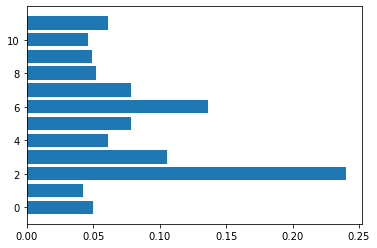

In [68]:
#calculating feature importances
importances = model.feature_importances_

plt.barh(range(X.shape[1]), importances)
plt.show()

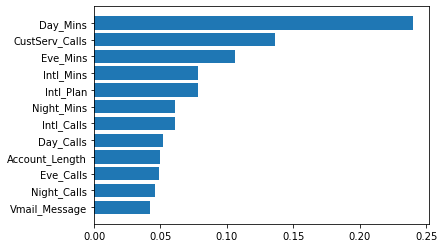

In [69]:
#add labels of the features in the plot
sorted_index = np.argsort(importances)
labels = X.columns[sorted_index]

plt.clf()
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

### The Random Forest Classifier works best for the Customer Churn Classification problem for our dataset. Rather than looking at the accuracy, the Precision, Recall, F1 score and the Area Under Curve (AUC) are important metrics used for reaching at this conclusion after model evaluation on our imbalanced dataset.